In [5]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

In [2]:
from scripts.profanity_check import profanity_processing
from scripts.embedding_model import universal_sentence_encoder
from scripts.clasterer import Clasterer

/home/drozdovmk/anaconda3/envs/text_cluster_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-02 03:44:58.087937: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 03:44:58.097089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 03:44:58.107224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
202

ModuleNotFoundError: No module named 'embedding_model'

In [7]:
responses = [
    "Я люблю свою работу за большую зарплату",
    "Много денег",
    "Хочу много долларов",
    "100 тысяч рублей в секунду",
    "Денежные премии!",
    "Бумажки",
    "Бабосики))",
    "В коллективе царит атмосфера поддержки.",
    "Дружелюбная атмосфера делает работу приятнее.",
    "Мы как друзья, не только коллеги.",
    "Каждый может высказать свое мнение.",
    "Команда — настоящая дружная семья.",
    "Позитивная атмосфера заряжает энергией.",
    "Все готовы поддерживать друг друга.",
    "Мы можем делиться радостями и трудностями.",
    "Вместе справляемся с любыми задачами.",
    "Всегда можно обратиться за помощью.",
    "Еда всегда свежая и аппетитная.",
    "В нашем меню много интересных блюд.",
    "Коллеги любят делиться рецептами.",
    "Проводим обеды с удовольствием и смехом.",
    "Каждую неделю пробуем что-то новое.",
    "Вместе готовим вкусные угощения.",
    "Обсуждаем кулинарные эксперименты после работы.",
    "Мы создаем неповторимые гастрономические пары.",
    "Еда помогает нам лучше узнать друг друга.",
    "Собираемся на праздники за вкусной едой.",
    "Всегда есть возможности для обучения.",
    "Поддерживаем друг друга в развитии.",
    "Обсуждаем новые идеи на митингах.",
    "Курсы и тренинги доступны каждому.",
    "Каждый может предложить свой проект.",
    "Ставим цели и достигаем их вместе.",
    "Обратная связь помогает расти профессионально.",
    "Читаем книги и делимся знаниями.",
    "Нас мотивирует желание стать лучше."
    
]
import csv
responses = pd.read_csv('Answers.csv')
# responses = responses['Phrase'].tolist()
responses = [response.lower() for response in responses]
responses = np.array(responses)
responses

array(['что мотивирует вас работать больше?', 'имя фамилия отчество',
       'наименование организации'], dtype='<U35')

In [18]:
responses = pd.read_csv('Answers.csv').iloc[1:,0].reset_index(drop=True).to_numpy()
responses

array(['Премия', 'Хорошая зарплата', 'Друзья на работе',
       'Возможность карьерного роста', 'Нормальная обстановка',
       'Да просто бабки нужны!', 'Получить опыт',
       "Prosto zhal' ne uspet'", 'Все ради команды', 'Крутые проекты!',
       'Заказов много, надо делать', 'Работа ради удовольствия',
       'Уважение коллег', 'Хорошая команда', 'Премии и бонусы',
       'Интересные задачи', 'Все ради семьи', 'Планы на будущее',
       'Удача на работе', 'Возможность развиваться',
       'Заработать на отпуск', 'За возможность учиться',
       'Да просто хрень какая-то', 'Нужен движ, иначе жопа',
       'Лаве, тачки, отдых', 'Чтоб не было скучно, блин',
       'Стабильность и уверенность', 'Проектная работа',
       'Личностный рост', 'Качественный отдых', 'Комфортные условия',
       'Эмоциональная поддержка', 'За новые идеи',
       'Чувство выполненного долга', 'Новые знакомства',
       'Возможность вести свои проекты', 'Интересные вызовы',
       'Поддержка со стороны коллег'

In [3]:
model = universal_sentence_encoder()

In [5]:
embeddings = model.transform(responses).numpy()
embeddings

array([[-0.04336929, -0.04771144, -0.00646861, ...,  0.03394429,
        -0.04923823,  0.04076206],
       [-0.07237895,  0.01913519,  0.0053976 , ..., -0.0196402 ,
        -0.0140229 ,  0.05923165],
       [-0.0268677 , -0.07258482,  0.04174445, ..., -0.03962073,
         0.03201427,  0.12654217],
       ...,
       [-0.04495552, -0.01578331, -0.03490985, ...,  0.01531898,
         0.01880101, -0.01880701],
       [-0.08269677, -0.06556217,  0.01358071, ...,  0.05969523,
         0.01894711,  0.09383823],
       [-0.04100374,  0.02040649,  0.03155389, ..., -0.00869058,
         0.00905247,  0.00431621]], dtype=float32)

In [6]:
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
# umap_model = umap.UMAP(n_neighbors=3, n_components=2, random_state=42)
# embeddings_reduced = umap_model.fit_transform(embeddings)

# tsne = TSNE(n_components=2, random_state=42, perplexity = 3)
# embeddings_reduced = tsne.fit_transform(embeddings, )

svd_model = TruncatedSVD(n_components=2)
embeddings_reduced = svd_model.fit_transform(embeddings)

/home/drozdovmk/anaconda3/envs/text_cluster_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(embeddings_reduced)
labels = km.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([102,  62,  77, 108,  89]))

In [8]:
from scripts.summarizer import gpt_summarizer
gs = gpt_summarizer(offline = False, count_offline_words = 3)

/tmp/ipykernel_106716/1659984921.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], cmap='Spectral', s=50)


['когда работа приносит новые знания — это мотивирует.', 'стабильный доход — это моя главная мотивация.', 'помогать другим через свою работу — это моя миссия.', '"просто приятно работать, когда все рядом."', '"когда работаешь ради стабильности, это даёт спокойствие."', 'командный дух мотивирует развиваться.', '"когда работа доставляет удовольствие, мотивация не пропадает."', '"работаю ради того, чтобы помогать людям."']
['работа + хорошая еда = идеальный день.', 'я радуюсь бесплатным экскурсиям по истории компании.', 'я люблю походы на концерты, организованные фирмой.', 'обожаю мастер-классы по ораторскому мастерству.', 'завтрак - это важная часть рабочего дня.', 'работать с голодным желудком - невыносимо.', 'я восторге от классов по медитации.', 'я наслаждаюсь спортом на свежем воздухе.']
['не хочу врываться в эту жесть.', 'радует бесплатный доступ к онлайн-курсам.', 'ф ыфлдоьалф ф.', 'системно проебываю пары.', 'ыфлдоьалф  ыылвь доыилытбидфт.', 'у нас есть возможность посещать спорти

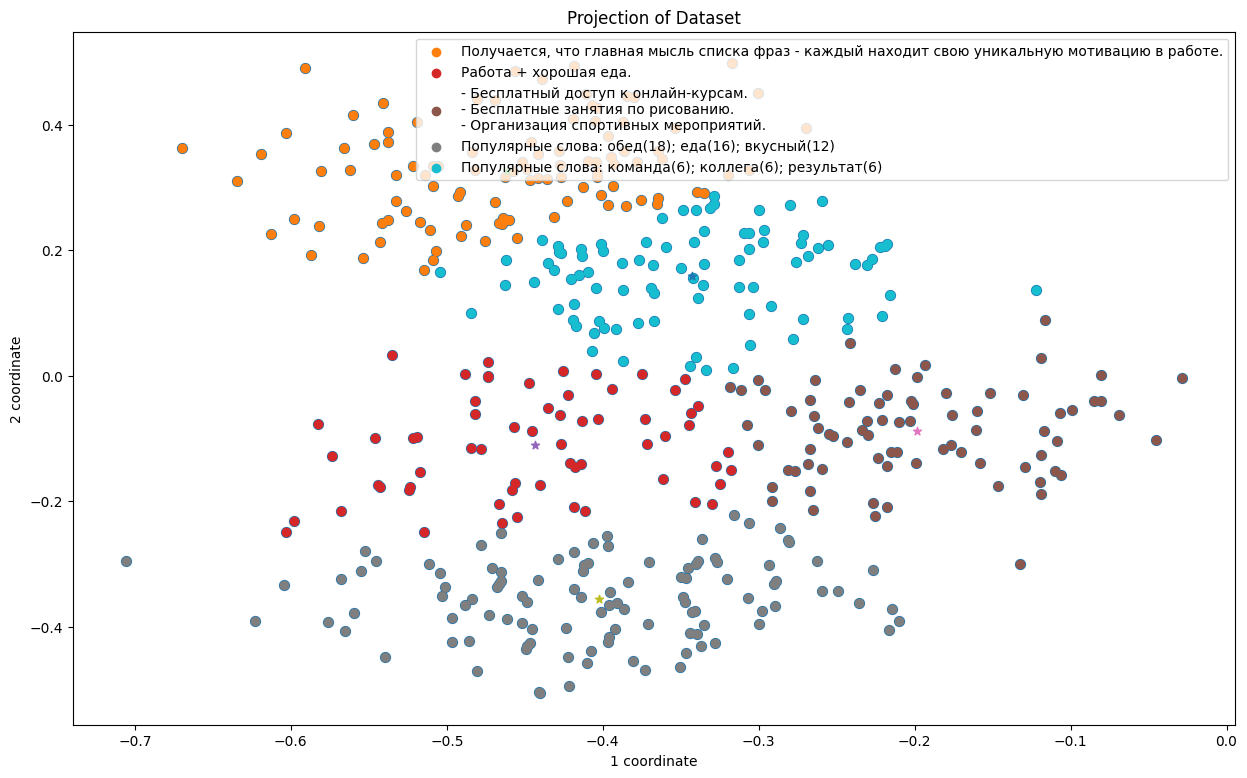

In [9]:
plt.figure(figsize=(15, 9))
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], cmap='Spectral', s=50)

for i, label in enumerate(np.unique(labels)):
    embeddings_oneclass = embeddings_reduced[labels==label]
    title = gs.summarize(responses[labels==label], embeddings=embeddings_reduced[labels==label])
    plt.scatter(embeddings_oneclass.T[0], embeddings_oneclass.T[1], label = title, )
    plt.scatter(km.cluster_centers_[i, 0], km.cluster_centers_[i, 1], marker='*',)
plt.title('Projection of Dataset')
plt.xlabel('1 coordinate')
plt.ylabel('2 coordinate')
# plt.colorbar(label='Class Label')
plt.legend()
plt.show()

In [10]:
# Функция для вычисления косинусного расстояния до центра
def cosine_distance(point, center):
    dot_product = np.dot(point, center.T)
    norm_point = np.linalg.norm(point)
    norm_center = np.linalg.norm(center)
    if norm_point == 0 or norm_center == 0:
        return 1  # защитный случай, если один из векторов нулевой
    return 1 - (dot_product / (norm_point * norm_center))

centers = km.cluster_centers_
i=1
# Создайте список пар (косинусное расстояние, точка)
distances = [(cosine_distance(point, centers[i]), phrase) 
             for (point, phrase) in zip(embeddings_reduced[labels==i], responses[labels==i])]

# Отсортируйте по убыванию косинусного расстояния
sorted_points = sorted(distances, key=lambda x: x[0], reverse=False)

# Получите упорядоченные точки
ordered_points = np.array([point for _, point in sorted_points])

In [17]:
import pandas as pd
csv_file = 'Answers.csv'
data = pd.read_csv(csv_file).iloc[1:,0].reset_index(drop=True).to_list()

In [18]:
data

['Премия',
 'Хорошая зарплата',
 'Друзья на работе',
 'Возможность карьерного роста',
 'Нормальная обстановка',
 'Да просто бабки нужны!',
 'Получить опыт',
 'Все ради команды',
 'Крутые проекты!',
 'Заказов много, надо делать',
 'Работа ради удовольствия',
 'Уважение коллег',
 'Хорошая команда',
 'Премии и бонусы',
 'Интересные задачи',
 'Все ради семьи',
 'Планы на будущее',
 'Удача на работе',
 'Возможность развиваться',
 'Заработать на отпуск',
 'За возможность учиться',
 'Да просто хрень какая-то',
 'Нужен движ, иначе жопа',
 'Лаве, тачки, отдых',
 'Чтоб не было скучно, блин',
 'Стабильность и уверенность',
 'Проектная работа',
 'Личностный рост',
 'Качественный отдых',
 'Комфортные условия',
 'Эмоциональная поддержка',
 'За новые идеи',
 'Чувство выполненного долга',
 'Новые знакомства',
 'Возможность вести свои проекты',
 'Интересные вызовы',
 'Поддержка со стороны коллег',
 'Хорошая атмосфера',
 'Сложные задачи',
 'Нужен опыт и знания',
 'Чтобы быть полезным',
 'Работа с команд

In [19]:
from scripts.embedding_model import RuBertEmbedder
rb = RuBertEmbedder()
rb.transform(data)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


array([[ 0.0256134 , -0.2938475 ,  0.09864219, ...,  0.28983793,
        -0.21812399, -0.03322938],
       [-0.01087773, -0.31742257,  0.305908  , ..., -0.01203262,
        -0.3684082 , -0.06940185],
       [ 0.09999546, -0.3494092 , -0.12669271, ..., -0.2507674 ,
        -0.04148233,  0.00780321],
       ...,
       [ 0.04433612, -0.2438026 ,  0.26952657, ...,  0.16130146,
         0.00434191, -0.11984681],
       [ 0.04067541, -0.20571266,  0.14181423, ...,  0.5647427 ,
        -0.0474913 , -0.220672  ],
       [-0.09552866, -0.448136  ,  0.35235134, ...,  0.1551449 ,
        -0.00127322,  0.09186467]], dtype=float32)

In [22]:
list(np.array([1,2,5]))

[1, 2, 5]